<a href="https://colab.research.google.com/github/soares-ed/DSNP-Projeto-01/blob/main/Analisando_os_Dados_do_Airbnb(Sydney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - *Sydney*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, analisaremos os dados referentes à cidade Sydney, e ver quais insights podem ser extraídos a partir de dados brutos.**
![](https://cdn-images-1.medium.com/max/1200/1*fb1txN5RpkXQayRfbmBXqw.jpeg)                 Photo by Dan Freeman on Unsplash

### **Sobre Sydney** 

Com uma população aproximada de 5,3 milhões de habitantes. Sydney é a maior cidade da Austrália. 

Seja por suas estruturas emblemáticas a Sydney Opera House e a Habour Brigde ou pelas belas praias. A cidade é considera uma das mais bonitas e habitáveis do mundo.

O turismo é uma atividade muito importante na Austrália e Sydney é umas das principais  porta de entrada do país.  Que recebe milhões de visitantes anualmente.




## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Sydney (good for visualisations)


Com isso em mente, vamos ao projeto


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# configurando a visualização
sns.set_style()
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/australia/nsw/sydney/2022-03-09/visualisations/listings.csv")

## Análise dos Dados

Antes de iniciar o projeto, vamos entender como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id usado para identificar o imóvel
* `name` -  nome da propriedade anunciada
* `host_id`  - número do proprietário do imóvel (anfitrião)
* `host_name` - nome do anfitrião
* `neighbourhood_group`  - coluna sem valores
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de quarto oferecido 
* `price` - preço de locação do imóvel
* `minimum nights` - mínimo de noites que é possível alugar
* `number_of_reviews` - número de avaliações do imóvel
* `last_review` - data da última avaliação do imóvel
* `reviews_per_month`  - quantidade de avaliações no mês
* `calculated_host_listing_count` - quantidade de imóvel do mesmo anfitrião
* `availability_365` - disponibilidade ao longo do ano
* `license` - se o imóvel possui licença de funcionamento


Inicialmente temos que verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3817911,1 bedroom entire floor harbour view apartment,19628833,Bob,NaN,Manly,-33.79783,151.26610,Entire home/apt,240,3,29,2022-01-30,0.44,2,269,3,Exempt
1,17350587,"Close to Macquarie Uni, Business Park and Center",58951796,Abhinav,NaN,Ryde,-33.77969,151.11832,Private room,58,90,2,2017-07-25,0.03,1,0,0,NaN
2,21635333,"Modern 2 bedder, waterviews, 3 transport options",95254100,Caroline,NaN,Ryde,-33.81783,151.09066,Entire home/apt,150,90,5,2018-01-06,0.10,1,0,0,NaN
3,27793108,Studio apartment near Mq University to yourself,209869436,Adiba,NaN,Ryde,-33.77922,151.10360,Private room,140,90,1,2018-08-22,0.02,1,0,0,NaN
4,39729467,Spacious room in East Ryde.,54563783,Mariusz,NaN,Ryde,-33.80571,151.13282,Private room,150,90,0,NaN,NaN,1,0,0,NaN


## **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Um lembrete, este *dataset* que estamos trabalhando é a versão resumida do Airbnb. Esta versão resumida dos dados é a `listings.csv`, a versão completa pode ser encontrada na mesma página  (`listings.csv.gz`).
 


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar o tipo de cada variável (coluna)
display(df.dtypes)

Entradas:	 20891
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## **Q2. Qual a porcentagem de valores ausentes no *dataset*?**



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round(((df.isnull().sum()/df.shape[0]).sort_values(ascending = False))*100,2)

neighbourhood_group               100.00
license                            61.50
reviews_per_month                  25.90
last_review                        25.90
name                                0.03
host_name                           0.02
number_of_reviews                   0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
id                                  0.00
minimum_nights                      0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
price                               0.00
dtype: float64

A quantidade de valores ausentes neste *dataset*, para algumas variáveis é alto, como podemos identificar abaixo:

* A variável `neighbourhood_group` tem **100%** dos seus valores ausentes

* A variável `license` tem **61.50%** dos seus valores ausentes

* As variáveis `review_per_month` e `last_review` têm aproximadamente **25%** dos valores ausentes



###Excluindo dados ausentes
 
Colunas com baixo poder pedritivo e com grande quantidade de dados ausentes podem ser excluídas do nosso Data Frame.
O principal é ter um *dataset* robusto com dados de qualidade e não apenas quantidade. 

Vamos excluir as colunas:

 * `neighbourhood_group`

 * `license`

* `reviews_per_month`

* `last_review`

* `name`

* `host_name`

Antes excluir as colunas, vamos criar uma cópia do nosso Data Frame. 



In [ ]:
# excluindo colunas com dados faltantes
df_clean = df.copy()
df_clean.drop(columns=['reviews_per_month', 'last_review', 'neighbourhood_group', 'name','host_name', 'license'], inplace=True)

###Feita a limpeza é hora de conferir


In [ ]:
# verificando o resultado
(df_clean.isnull().sum()).sort_values(ascending=False)

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, vamos plotar o histograma.

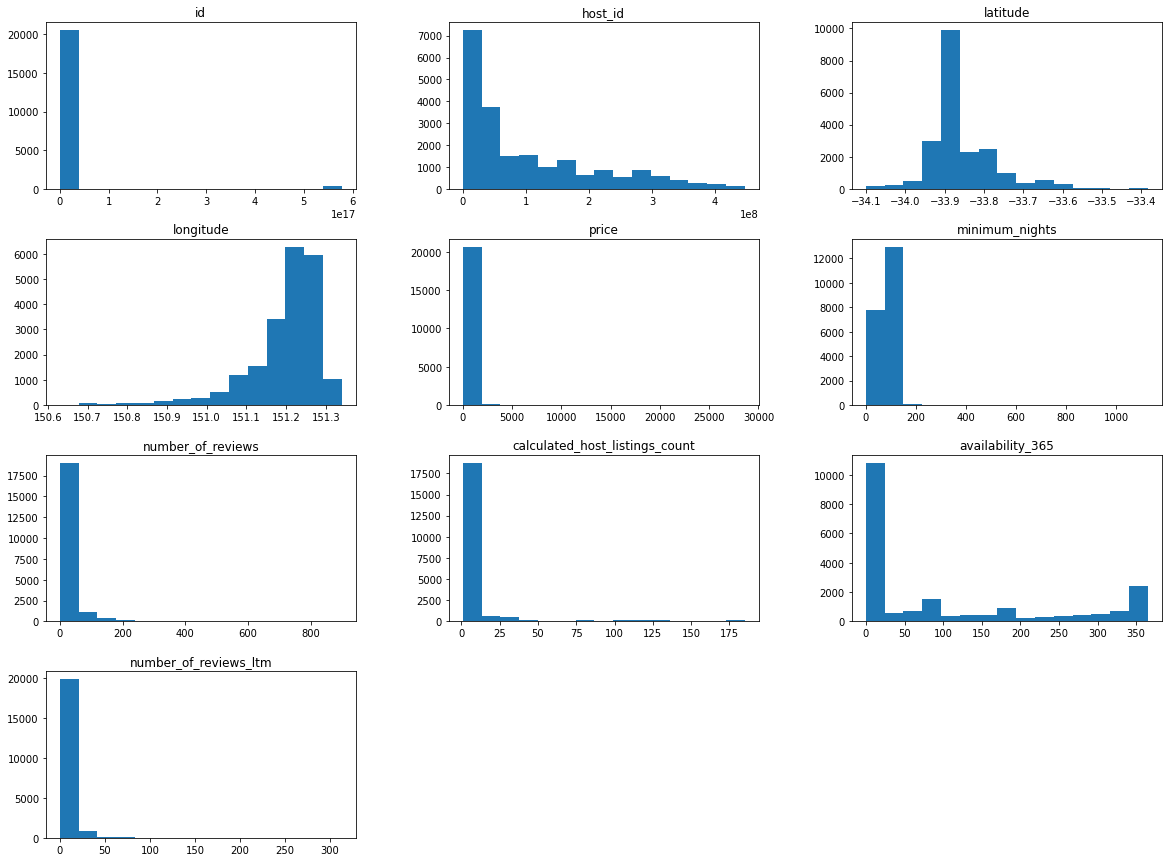

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(20,15), grid=False);

###Identificando *outliers*

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses *outliers*, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.



In [ ]:
# ver resumo estatístico das variáveis numéricas:
df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365',]].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000
mean,250.100953,59.814992,18.746781,8.355703,102.568187
std,494.321771,53.367768,44.330461,25.267494,133.375313
min,13.000000,1.000000,0.000000,1.000000,0.000000
25%,80.000000,3.000000,0.000000,1.000000,0.000000
50%,144.000000,90.000000,3.000000,1.000000,8.000000
75%,250.000000,90.000000,14.000000,3.000000,180.000000
max,28613.000000,1125.000000,899.000000,185.000000,365.000000


Analisando o resumo estatistísco notamos a presença de outliers nas variantes `price` e `minimum_nights`:


*   A coluna `price` tem 75% do seu valor até 250 dólares australianos (AUD) com o valor máximo de AUD 28613.

*   A variante `minimum_nights` possui a quantidade máxima de tempo de locação com mais de 1000 noites.

* Importante, nesta análise vamos tratar os outlier apenas destas duas variáveis `price` e `minimum_nights`. 



###Limpando Outliers

Nos já plotamos o histograma e temos o resumo estatístisto dos dados.

Agora para tratar dos outliers desse conjunto de dados, iremos calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

IQR = Q3 - Q1

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

Para tratá-los vamos seguir os seguintes passos:

*Definir o Q1 e Q3 para as variáveis que serão limpas.

*Calcular o IQR para as variáveis.

*Definir o limite superior e inferior para cortar os outliers.

*Remover os outliers.

### Cálculo do IQR Variável `price`

In [ ]:
#identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price:', IQR_price)

#definindo limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price + 1.5 * IQR_price

print("Limite superior de price:", sup_price)
print("Limite inferior de price:", inf_price)


IQR da variável price: 170.0
Limite superior de price: 505.0
Limite inferior de price: 335.0


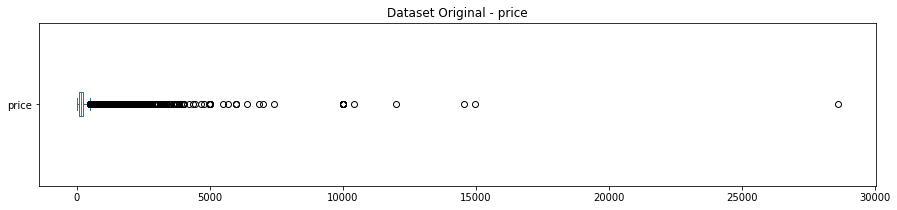

O dataset possui 20891 colunas
1920 Entradas acima de 505
Representam 9.19% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 505".format(len(df_clean[df_clean.price > 505])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 505]) / df_clean.shape[0])*100))

### Cálculo do IQR Variável `minimum_nights`

In [ ]:
#identificando os outliers para a variável minimum_nigths
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights:', IQR_minimum_nights)

#definindo limites
sup_minimum_nigths = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nigths = q1_minimum_nights + 1.5 * IQR_minimum_nights

print("Limite superior de minimum_nights:", sup_minimum_nigths)
print("Limite inferior de minimum_nights:", inf_minimum_nigths)


IQR da variável minimum_nights: 87.0
Limite superior de minimum_nights: 220.5
Limite inferior de minimum_nights: 133.5


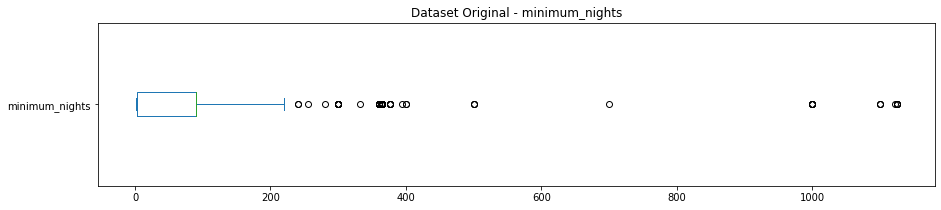

O dataset possui 20891 colunas
84 Entradas acima de 220.5
Representam 0.40% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 220.5".format(len(df_clean[df_clean.minimum_nights > 220.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 220.5]) / df_clean.shape[0])*100))

In [ ]:
# limpando o dataset
df_limpo = df_clean.copy()

df_limpo.drop(df_limpo[df_limpo.price > 505].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 220.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_clean.shape)
print('Shape após a limpeza: ',df_limpo.shape)

Shape antes da limpeza:  (20891, 12)
Shape após a limpeza:  (18896, 12)


###Comparando os *dataset* da variável price

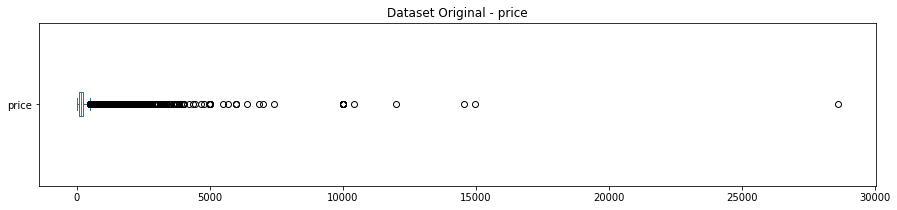

O dataset possui 20891 colunas
1920 Entradas acima de 505
Representam 9.19% do dataset


In [ ]:
#plotando o bloxpot original da variável price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 505".format(len(df_clean[df_clean.price > 505])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 505]) / df_clean.shape[0])*100))


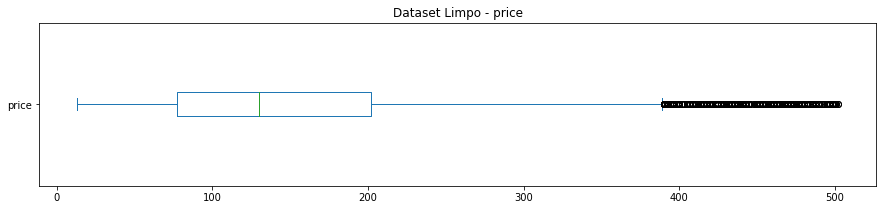

O dataset possui 18896 colunas
0 Entradas acima de 505
Representam 0.00% do dataset


In [ ]:
#plotando o bloxpot limpo da variável price
fig, ax = plt.subplots(figsize=(15,3))
df_limpo.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("O dataset possui {} colunas".format(df_limpo.shape[0]))
print("{} Entradas acima de 505".format(len(df_limpo[df_limpo.price > 505])))
print("Representam {:.2f}% do dataset".format((len(df_limpo[df_limpo.price > 505]) / df_limpo.shape[0])*100))

###Comparando os *dataset* da minimum_nights

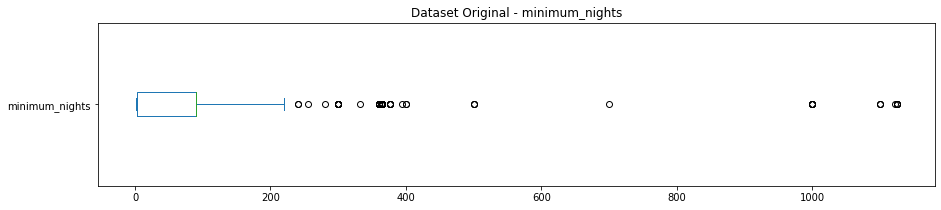

O dataset possui 20891 colunas
84 Entradas acima de 220.5
Representam 0.40% do dataset


In [ ]:
#plotando o bloxpot original da variável minimum_nigths
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_clean.shape[0]))
print("{} Entradas acima de 220.5".format(len(df_clean[df_clean.minimum_nights > 220.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 220.5]) / df_clean.shape[0])*100))

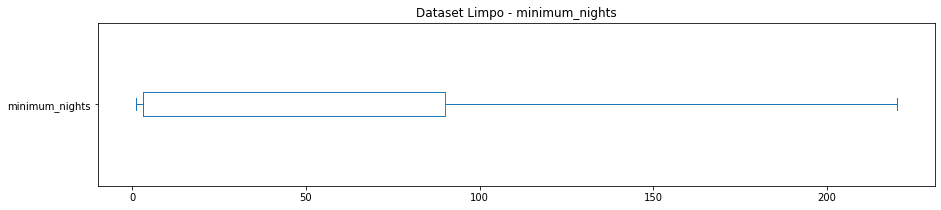

O dataset possui 18896 colunas
0 Entradas acima de 220.5
Representam 0.00% do dataset


In [ ]:
#plotando o bloxpot limpo da variável minimum_nigths
fig, ax = plt.subplots(figsize=(15,3))
df_limpo.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_limpo.shape[0]))
print("{} Entradas acima de 220.5".format(len(df_limpo[df_limpo.minimum_nights > 220.5])))
print("Representam {:.2f}% do dataset".format((len(df_limpo[df_limpo.minimum_nights > 220.5]) / df_limpo.shape[0])*100))

### Distribuição das variáveis dos dados limpos
Para garantir que não há mais *outliers* vamos análisar a distribuição das variáveis novamente
* Histograma
* Distribuição Estátistica

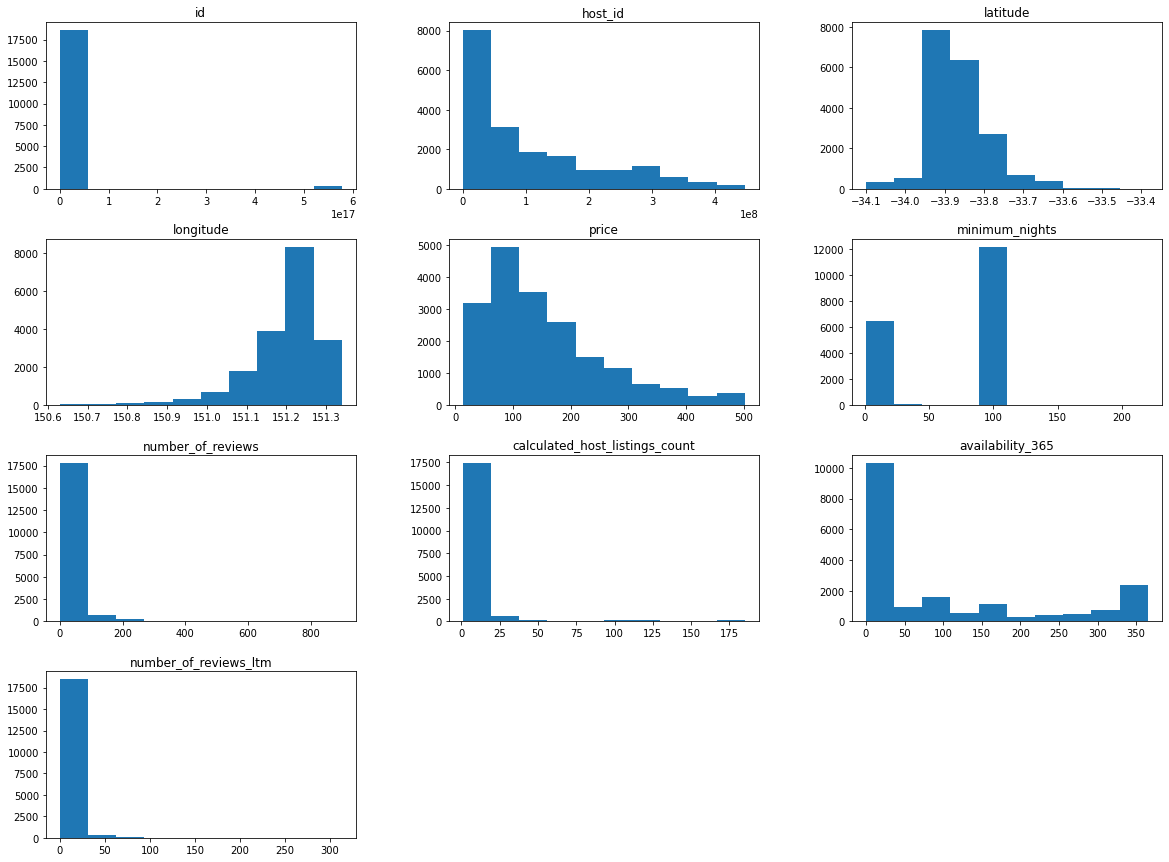

In [ ]:
# verificando as distribuições
df_limpo.hist(figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_limpo.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.889600e+04,18896.0,18896.0,18896.0,18896.0,18896.0,18896.0,18896.0,18896.0,18896.0
mean,9.361890e+15,104562423.0,-33.9,151.2,157.8,60.2,19.6,7.8,98.5,3.6
std,7.170301e+16,107754687.7,0.1,0.1,106.3,41.9,45.5,24.9,131.9,10.0
min,1.115600e+04,21741.0,-34.1,150.6,13.0,1.0,0.0,1.0,0.0,0.0
25%,1.523876e+07,20325086.0,-33.9,151.2,77.0,3.0,0.0,1.0,0.0,0.0
50%,2.732315e+07,55349964.5,-33.9,151.2,130.0,90.0,3.0,1.0,0.0,0.0
75%,4.050754e+07,162626670.0,-33.8,151.3,202.0,90.0,15.0,2.0,179.0,2.0
max,5.778273e+17,447279434.0,-33.4,151.3,502.0,220.0,899.0,185.0,365.0,313.0


### Destaques
* As medianas das variáveis `price` e `mininum_nigths`não sofreram tantas alterações. 

* Os valores ficaram próximos do *dataset* original. Mostrando a robustez do método IQR


## **Q4. Qual a média dos preços de aluguel?**


Um imóvel na cidade de Sydney custa em média, independente da localidade, **157,78** dólares australianos 

In [ ]:
# Ver a média da coluna price
print("Preço médio:", round(df_limpo['price'].mean(),2), "dólares austrálianos")

Preço médio: 157.78 dólares austrálianos


## **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
           'availability_365', 'latitude' , 'longitude','reviews_per_month']].corr()


# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude,reviews_per_month
price,1.000000,-0.055876,-0.037559,0.068342,0.069485,0.182591,0.152592,-0.006706
minimum_nights,-0.055876,1.000000,-0.253684,-0.190462,-0.258915,-0.145398,-0.004786,-0.387754
number_of_reviews,-0.037559,-0.253684,1.000000,-0.033434,0.146644,0.021589,-0.012862,0.712719
calculated_host_listings_count,0.068342,-0.190462,-0.033434,1.000000,0.228579,-0.003215,0.032015,0.021723
availability_365,0.069485,-0.258915,0.146644,0.228579,1.000000,0.102613,-0.120967,0.223606
latitude,0.182591,-0.145398,0.021589,-0.003215,0.102613,1.000000,0.097086,0.057587
longitude,0.152592,-0.004786,-0.012862,0.032015,-0.120967,0.097086,1.000000,-0.051694
reviews_per_month,-0.006706,-0.387754,0.712719,0.021723,0.223606,0.057587,-0.051694,1.000000


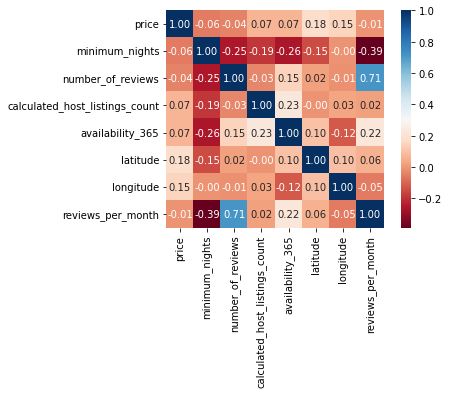

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Os valores de correlação são identificados como fracos, moderados ou fortes da seguinte forma:

* **Fraco**
o valor absoluto é 0,3 ou inferior

* **Moderado**
o valor absoluto é maior que 0,3 e menor ou igual a 0,6

* **Forte**
o valor absoluto é maior que 0,6




## **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o `método value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_limpo.room_type.value_counts()

Entire home/apt    11657
Private room        6802
Shared room          314
Hotel room           123
Name: room_type, dtype: int64

Acima temos os valores absolutos dos imóveis no nosso *dataset*. Para uma melhor compreenção, vamos usar porcentagem.

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
Percentual_Imovel = round((df_limpo['room_type'].value_counts()/df_limpo.shape[0])*100,2)

Percentual_Imovel

Entire home/apt    61.69
Private room       36.00
Shared room         1.66
Hotel room          0.65
Name: room_type, dtype: float64

### **Destaque**

* **61%** dos imóveis são casa inteira
* **36%** são de quartos privados
* **1,66%** são de quartos compartilhados
* Apenas **0.65%** de quartos de hotéis


Vamos plotar um gráfico de Waffle para comunicar os nossos dados.

In [ ]:
# Instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 25.1 MB 4.7 MB/s 


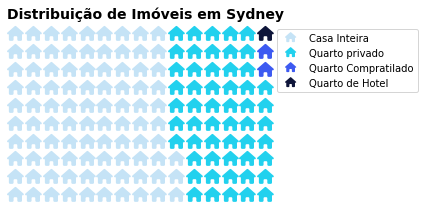

In [ ]:
# Importar a biblioteca pywaffle
from pywaffle import Waffle

# Colocar a legenda fora do corpo do gráfico
fig = plt.figure(
    FigureClass = Waffle, 
    rows = 10,
    columns = 15,
    colors = ['#c5e3f6', '#22d1ee', '#3d5af1','#0e153a'],
    font_size = 'xx-large',
    values = Percentual_Imovel,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels = ['Casa Inteira', 'Quarto privado', 'Quarto Compratilado', 'Quarto de Hotel'],
    icons='house', icon_size=15, 
    icon_legend=True
)

plt.title('Distribuição de Imóveis em Sydney', weight='bold', size=14, loc = 'left');

# Salvar imagem
plt.savefig('Waffle.png')

## **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
preco_medio = round(df_limpo.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False),1)[:10]

preco_medio

neighbourhood
Pittwater           251.9
Manly               226.7
Mosman              203.9
Warringah           194.7
Sutherland Shire    182.2
Woollahra           181.1
Waverley            181.0
Hunters Hill        177.0
Leichhardt          175.4
North Sydney        168.5
Name: price, dtype: float64

Vamos verificar quantas entradas existem para cada bairro

In [ ]:
#quantidade de entradas para cada bairro
df_limpo.neighbourhood.value_counts()


Sydney              4714
Waverley            2456
Randwick            1703
Warringah            860
Manly                813
North Sydney         706
Woollahra            704
Marrickville         629
Rockdale             485
Pittwater            462
Leichhardt           448
Botany Bay           388
Ryde                 369
Parramatta           330
Sutherland Shire     320
Willoughby           294
Hornsby              290
Auburn               284
Canada Bay           240
Canterbury           206
Ku-Ring-Gai          193
Mosman               191
Blacktown            186
Burwood              184
The Hills Shire      179
Ashfield             151
Lane Cove            144
Bankstown            132
Hurstville           126
Penrith              124
City Of Kogarah      119
Strathfield          114
Liverpool             89
Fairfield             87
Campbelltown          61
Holroyd               43
Camden                42
Hunters Hill          30
Name: neighbourhood, dtype: int64

Vamo plotar um gráfico com os eventos nas 10 localidades mais cara do nosso *dataset*

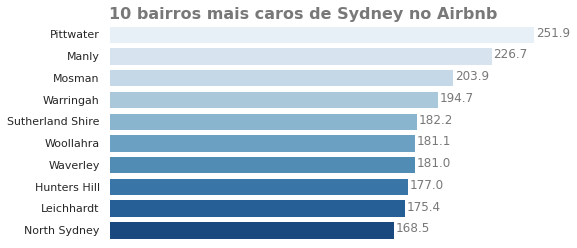

In [ ]:
# Criar uma variável para receber os tipos de imóveis
tipo_bairros = preco_medio.index.to_list()

# Criar uma variável para receber os percentuais dos tipos de imóvel
percentual_bairros = preco_medio.to_list()

# Criar uma figura para o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))

# Escolher o tema do Seaborn
sns.set_theme(style="whitegrid")

# Fazer o gráfico de barras com o Seaborn
sns.barplot(
            x = percentual_bairros, 
            y = tipo_bairros, 
            palette="Blues")

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remover eixo y
plt.gca().axes.get_xaxis().set_visible(False)

# Remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

# Colocar os valores acima do gráfico de barra
for i, v in enumerate(percentual_bairros):
    ax.text(v + 1, i + 0.1, str(v), color = '#787878')

# Plotar título
plt.text(0, -0.7, '10 bairros mais caros de Sydney no Airbnb',
         fontsize=16, 
         color='#787878',
         weight='bold')

plt.show()

# Salvar imagem
# plt.savefig('MaisCaras.png')

Definindo se as amostras são representativas

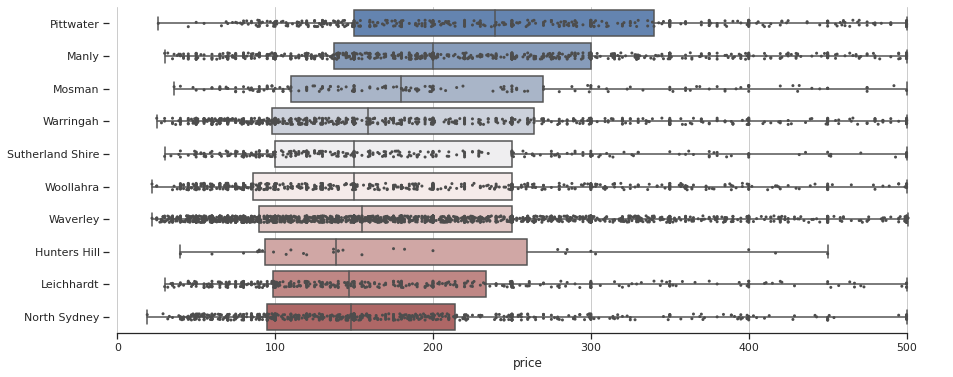

In [ ]:
# Definir variável para receber a lista dos 10 bairros mais caros
bairros_sydney = preco_medio.index.to_list()

# Criar o dataframe com os 10 bairros mais caros e gerar o box plot
frames = []

for bairros in bairros_sydney:
  frames.append(df_limpo[df_limpo['neighbourhood'] == bairros])

result = pd.concat(frames)

# Escolher o tema ticks
sns.set_theme(style="ticks")

# Inicializar a figura para construir os boxplots
f, ax = plt.subplots(figsize=(15, 6))

# Plotar o gráfico
sns.boxplot(
            x='price', 
            y='neighbourhood', 
            data=result,
            whis=[0, 100], 
            width=.8, 
            palette="vlag"
            )

# Adicionar as observações
sns.stripplot(
              x='price', 
              y='neighbourhood', 
              data=result,
              size=3, 
              color=".3", 
              linewidth=0)

# Ajustar a apresentação visual
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

As 10 localidades mais caras possuem bastante dados de entrada. As entradas são representadas pelos pontos no gráfico *bloxplot*.

Como os dados são representativos, o preço médio não está destorcido.


### Plotando o gráfico de longitude x latitude

Para um melhor entendimento do gáfico, vamos inseir um mapa da cidade de Sydney.

![](https://sydneymap360.com/img/1200/sydney-neighborhood-map.jpg)

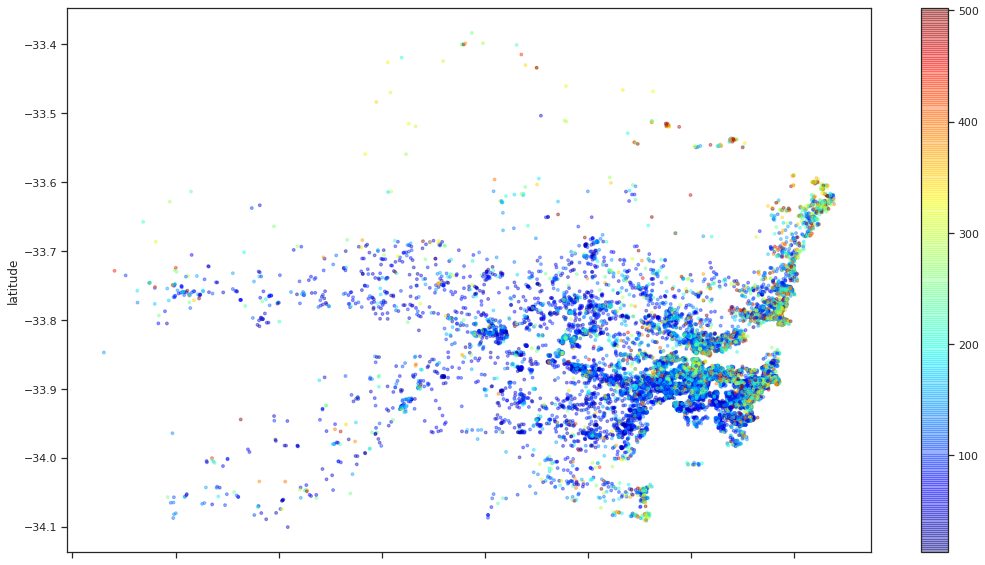

In [ ]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'],s=8, cmap=plt.get_cmap('jet'), figsize=(18,10));

## **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# Ver a média da coluna `minimum_nights`
print("A média de noites mínima são aproximadamente:", round(df_limpo['minimum_nights'].mean(),0), "noites")

A média de noites mínima são aproximadamente: 60.0 noites


# Conclusões


Considerando que fizemos uma análise superficial dos dados do Airbnb, foi possível encontrar alguns *outliers*. Após trabalhadas as variáveis`price` e `mininum_nights` ficaram mais condizentes com a realidade. O método IQR se mostrou muito robusto e eficiente em tratar as discrepâncias.

Vimos que o preço médio para se hospedar em Sydney é de 157 dólares australianos. E a média de noites está em aproximadamente 60 noites de estádia mínima. 

Um fato que chamou a atenção foi que 60% dos imóveis não possuem licença de funcionamento. Conforme a lei local, imóveis de curta estadia precisam de uma licença específica.
Este aspecto afeta diretamente a variável, `minimum_nights` já que 75% das entradas são para 90 noites mínimas de estadia. Provavelmente esta foi uma maneira que os *hosts* encontraram de não usar a licença específica para imóveis de curta estadia.

A amostra para as localidades mais cara é bem representativa. Temos uma quantidade grande de dados para cada bairro. 

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.


